<a href="https://colab.research.google.com/github/aabarzu/sales-predictions/blob/main/salesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lectura de Datos**

In [1196]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #  force_remount=True , pide eso no sé porqué
import pandas as pd

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import seaborn as sns


filename = '/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/sales_predictions.csv'     # csv

df = pd.read_csv(filename)   # csv
#,skiprows = 4 --> Saltar filas del archivo y comenzar más abao

df 

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1198]:
df.shape

(8523, 12)

## **Resumen General antes de Limpiar**

In [1199]:
#Resumen

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Datos Faltantes**

In [1200]:

Total_Datos= df.shape[0]

for columna in df.columns:

  data_None= df[columna].isna()
 
  if data_None.sum() >0:
    print(f" La columna '{columna}' Tiene  {data_None.sum()} Registros Nulos { round( data_None.sum()/ Total_Datos * 100.0 , 4)} % de los datos")
 

 La columna 'Item_Weight' Tiene  1463 Registros Nulos 17.1653 % de los datos
 La columna 'Outlet_Size' Tiene  2410 Registros Nulos 28.2764 % de los datos


In [1201]:
def Analisifield(df,column):
 
  data = pd.DataFrame([{ 'Field':'','Numbers':0, 'NoNumbers':0 ,'NaN':0, 'NaN%':0,'TotalRows':0 ,'dtypes':'','Length':0 }])
  
  data['Field']      = column
 
  try:
    df[column].count()
  except:
    return data  

  data['dtypes'] = df[column].dtypes
  try:

    if df[column].dtypes == object:

      filtro = df[column].str.isnumeric()
      
      data['Numbers']    = df[filtro==True][column].count()
      data['NoNumbers'] = df[filtro==False][column].count()
      data['Length'] = df[column].str.len()
    else:
      data['Numbers']    = df[column].count()

  except:
    
    data['NoNumbers'] = df[column].count()

  try:
    data['NaN']  =  df[column].isna().sum()
    data['NaN%'] =  df[column].isna().sum()/df.shape[0]*100
  except:
    data['NaN'] = 0

  data['TotalRows'] = data['Numbers'] + data['NoNumbers'] + data['NaN'] 
  
  return data

data = pd.DataFrame(columns=['Field','Numbers','NoNumbers','NaN','NaN%','dtypes'])

for column in df.columns:

  data =pd.concat([data,Analisifield(df,column)]) 
    

data.reset_index(inplace =True,drop=True)

data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,Item_Identifier,0,8523,0,0.000000,object,8523.0,5.0
1,Item_Weight,7060,0,1463,17.165317,float64,8523.0,0.0
2,Item_Fat_Content,0,8523,0,0.000000,object,8523.0,7.0
3,Item_Visibility,8523,0,0,0.000000,float64,8523.0,0.0
4,Item_Type,0,8523,0,0.000000,object,8523.0,5.0
5,Item_MRP,8523,0,0,0.000000,float64,8523.0,0.0
6,Outlet_Identifier,0,8523,0,0.000000,object,8523.0,6.0
7,Outlet_Establishment_Year,8523,0,0,0.000000,int64,8523.0,0.0
8,Outlet_Size,0,6113,2410,28.276428,object,8523.0,6.0
9,Outlet_Location_Type,0,8523,0,0.000000,object,8523.0,6.0


In [1202]:
#filas de Campos con datos numericos y No númericos
filtro = (data['Numbers']>0) & (data['NoNumbers'] >0)
data[filtro]

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [1203]:
#filas de NaN
filtro = (data['NaN']>0) 
data[filtro]

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
1,Item_Weight,7060,0,1463,17.165317,float64,8523.0,0.0
8,Outlet_Size,0,6113,2410,28.276428,object,8523.0,6.0


### Depurar campo **'Item_Weight'**

In [1204]:
filter_datos_none = df['Item_Weight'].isna()
df[filter_datos_none]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [1205]:
df[~filter_datos_none]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### **Buscando datos para reemplazar**

In [1206]:
data1 = df.groupby(['Item_Identifier'])[['Item_Weight']].min() # Buscar el promedio de los datos

In [1207]:
data2 = df.groupby(['Item_Identifier'])[['Item_Weight']].max() # Buscar el promedio de los datos

In [1208]:
data3 = df.groupby(['Item_Identifier'])[['Item_Weight']].mean() # Buscar el promedio de los datos

In [1209]:
data4 = df.groupby(['Item_Identifier'])[['Item_Weight']].count() # Buscar el contar de los datos

In [1210]:
dataframes = [data1,data2,data3,data4]
keys = ['Item_Identifier']
result = pd.concat(dataframes , axis=1 , names =['Min','Max','Mean'])

result.columns = ['Min','Max','Mean','Count']

result['Dif'] = ( result['Min'] != result['Max'] ) & (  result['Mean'] != result['Max'] ) & ( result['Mean'] != result['Min'] )



### Item_Identifier donde no hay ningún datos 

In [1211]:
datos_diff = result['Dif'] == True
result[datos_diff==True]

,Min,Max,Mean,Count,Dif
Item_Identifier,,,,,
FDE52,NaN,NaN,NaN,0,True
FDK57,NaN,NaN,NaN,0,True
FDN52,NaN,NaN,NaN,0,True
FDQ60,NaN,NaN,NaN,0,True


In [1212]:
filtro_datos = (df['Item_Identifier'] == 'FDE52') | (df['Item_Identifier'] == 'FDK57') | (df['Item_Identifier'] == 'FDN52') | ( df['Item_Identifier'] == 'FDQ60')
df[filtro_datos]




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [1213]:
#Se eliminan los datos para estos registros debido a que no existe
df = df[~filtro_datos]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Tabladonde existen otros datos por **'Item_Identifier'**

In [1214]:
result[datos_diff==False]

,Min,Max,Mean,Count,Dif
Item_Identifier,,,,,
DRA12,11.600,11.600,11.600,6,False
DRA24,19.350,19.350,19.350,5,False
DRA59,8.270,8.270,8.270,6,False
DRB01,7.390,7.390,7.390,2,False
DRB13,6.115,6.115,6.115,5,False
...,...,...,...,...,...
NCZ30,6.590,6.590,6.590,6,False
NCZ41,19.850,19.850,19.850,5,False
NCZ42,10.500,10.500,10.500,5,False


In [1215]:
filtro =df['Item_Identifier'] == 'FDP10'

df[filtro]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [1216]:
df = df.fillna(method="ffill")


In [1217]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1218]:
filtro =df['Item_Identifier'] == 'FDP10'

df[filtro]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,13.65,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.00,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.00,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,Small,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.00,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.00,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.00,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,Small,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.00,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [1219]:
filter_datos_none = df['Outlet_Size'].isna()
df[filter_datos_none]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [1220]:
df['Outlet_Size'].value_counts() # Muetsra los tipos de Datos

Medium    3908
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

### **Elementos duplicados**

In [1221]:
datos_duplicado = df.duplicated(keep=False)

df[datos_duplicado]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


## **Resumen General despues de Limpiar**

In [1222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [1223]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.850323,0.066112,141.010019,1997.837892,2181.188779
std,4.630771,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.600000,0.053925,143.047000,1999.000000,1794.331000
75%,16.750000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1224]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Mayores Ventas x productos

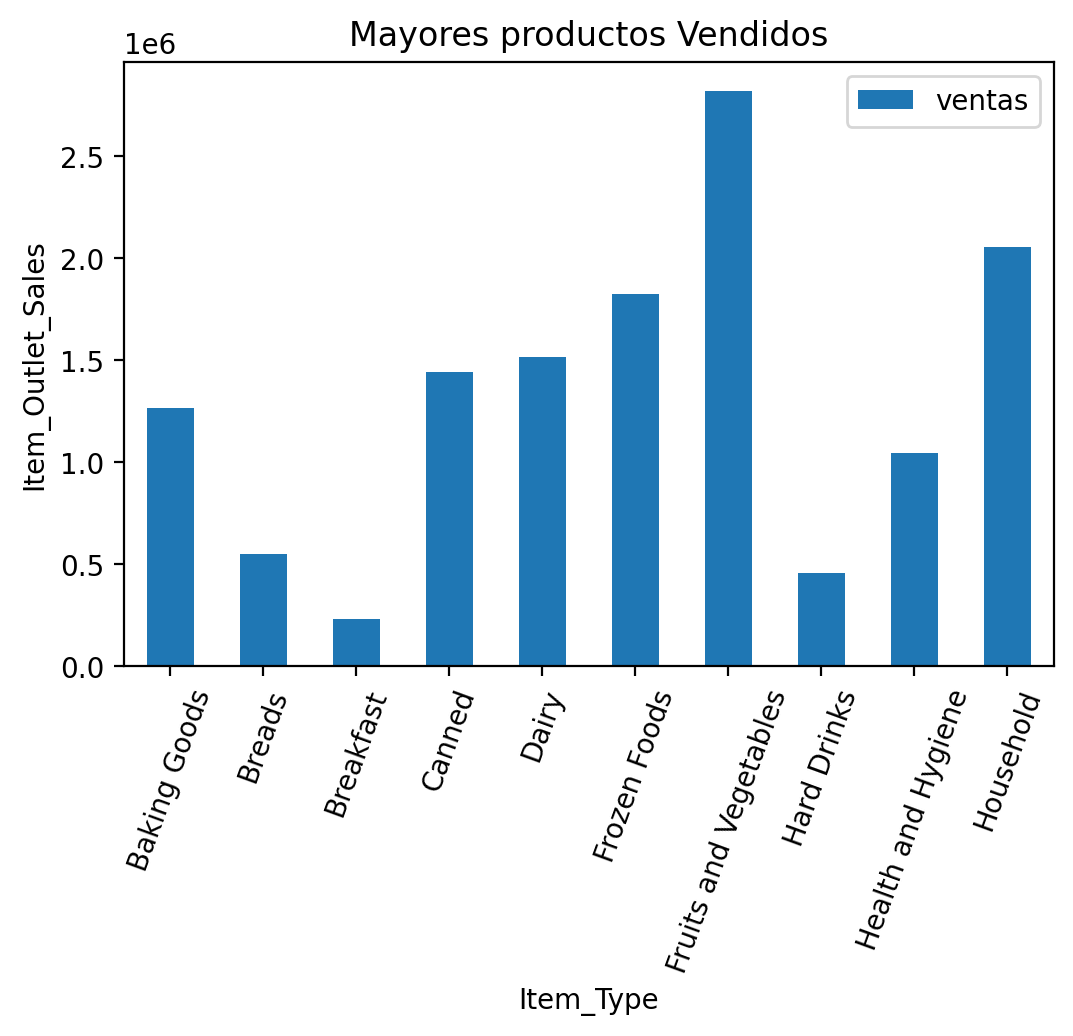

In [1231]:
data_grafo=df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().head(10)

plt.figure(dpi=200) #resolución de figura (implica tamaño)
data_grafo.plot.bar(rot=70);
plt.legend(['ventas']);
plt.title('Mayores productos Vendidos');
plt.ylabel("Item_Outlet_Sales");
plt.xlabel("Item_Type");
plt.show();

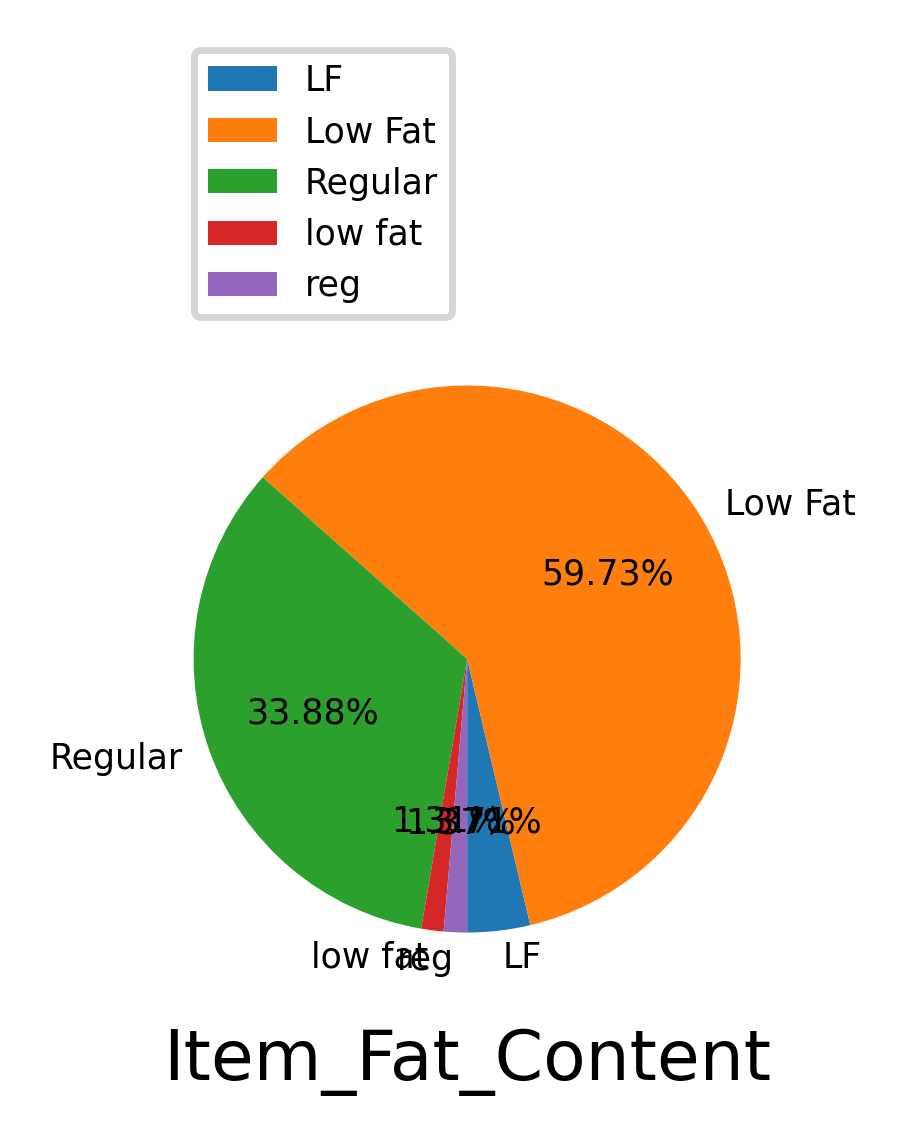

In [1250]:
data_grafo = df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()


etiquetas = data_grafo.index
textprops = {"fontsize":5}

fig1 = plt.figure(dpi=500)
ax1 = fig1.add_subplot(1,3,2)
ax1.pie(data_grafo,  autopct="%.2f%%", shadow = False, startangle=-90 , labels=etiquetas , textprops =textprops)
ax1.set_xlabel('Item_Fat_Content');
ax1.legend( prop={'size': 5} , loc=[0.1,1]);
plt.show();

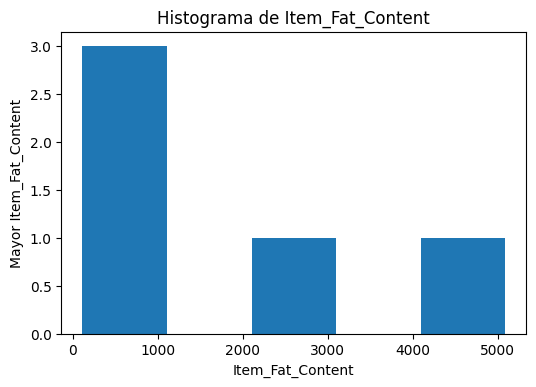

In [1255]:

data_grafo = df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

mu = 100 #media 



#datos histograma
num_bins = 5 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.hist(data_grafo, num_bins, )

ax1.set_xlabel("Item_Fat_Content")
ax1.set_ylabel("Mayor Item_Fat_Content")
ax1.set_title("Histograma de Item_Fat_Content")

plt.show()

In [1234]:
 df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count().head(10)

Item_Fat_Content
LF          316
Low Fat    5088
Regular    2886
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64